In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import tree
from matplotlib import pyplot as plt
import graphviz
import numpy as np
import tensorflow as tf

conda install -c anaconda python-graphviz

conda install -c anaconda pydot

In [54]:
giocatori = pd.read_csv('..\dataset\giocatori.csv')

giocatori = giocatori.drop('nome_giocatore', axis = 1)
giocatori = giocatori.drop('numero_giocatore', axis = 1)
giocatori = giocatori.drop('squadra', axis = 1)
giocatori = giocatori.drop('rim_d', axis = 1)
giocatori = giocatori.drop('rim_o', axis = 1)
giocatori = giocatori.drop('t1_per', axis = 1)
giocatori = giocatori.drop('t2_per', axis = 1)
giocatori = giocatori.drop('t3_per', axis = 1)

players_without_role = giocatori.loc[(giocatori["ruolo"].isnull()) | (giocatori["ruolo"] == "NaN")]
players_without_role = players_without_role.drop('ruolo', axis = 1)

giocatori = giocatori.dropna();

# Definire una funzione per scalare i valori di ogni riga
def scale_cols(df, col):
    df = df[df[col] != 0]
    factor = 40/df[col].values
    float_cols = df.select_dtypes(include=['float64']).columns
    float_cols = float_cols.drop(col)
    df.loc[:, float_cols] = df[float_cols].mul(factor, axis=0)
    return df

players_without_role = scale_cols(players_without_role, 'minuti')
players_without_role = players_without_role.drop('minuti', axis = 1)
players_without_role["altezza"] = players_without_role["altezza"].replace(0, np.nan, inplace=True)

giocatori = scale_cols(giocatori, 'minuti')
giocatori = giocatori.drop('minuti', axis = 1)

C:\Users\nicol\AppData\Local\Temp\ipykernel_18552\624021493.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, float_cols] = df[float_cols].mul(factor, axis=0)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18552\624021493.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, float_cols] = df[float_cols].mul(factor, axis=0)


In [55]:
x = giocatori.drop('ruolo', axis=1)
y = giocatori['ruolo']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=100)

Questo creerà un grafico che mostra come la performance del modello sui dati di training e di test cambia con l'aumentare del numero di esempi di formazione. Le aree verdi e rosse intorno alle linee mostrano la deviazione standard della valutazione del modello

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def stampa_learning_curve(metodo):
    train_sizes, train_scores, test_scores = learning_curve(
        metodo, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()


GridSearchCV
Questo codice implementa una grid search per la selezione dei parametri ottimali di un classificatore decisionale basato su alberi (DecisionTreeClassifier) utilizzando la libreria scikit-learn.

Il codice crea un oggetto param_grid che rappresenta la griglia di parametri da testare. In questo caso, la grid search eseguirà la validazione incrociata (cv=5) per testare la profondità massima dell'albero di decisione (max_depth) con valori di 3, 5, 7, 9, 11 e None e il numero minimo di campioni richiesti per dividere un nodo (min_samples_split) con valori di 2, 10, 30 e 50.

Viene quindi creato un oggetto grid_search che rappresenta l'effettiva grid search. Questo oggetto viene addestrato sui dati x e y utilizzando il metodo fit().

Infine, viene stampato il risultato della grid search: i parametri ottimali (best_params_) e la performance ottenuta con questi parametri (best_score_), espresso come percentuale con due cifre decimali.

Quasto modello non può lavorare con valori nulli. Dunque si scarta in caso si abbiano giocatori con valori nulli.

Best parameters found:  {'max_depth': 3, 'min_samples_split': 50}
Best score: 0.67


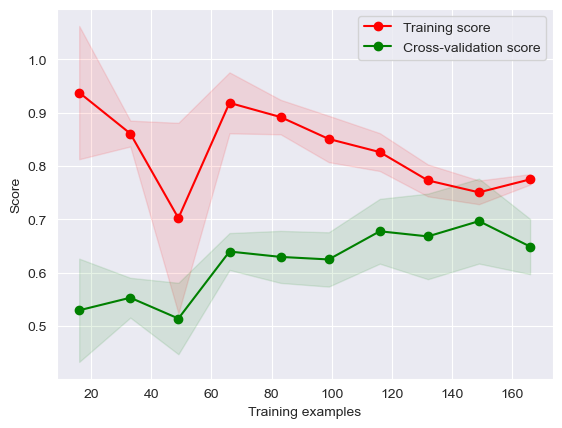

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 9,11,None],
              'min_samples_split': [2, 10, 30, 50]}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x, y)
clf = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)
print("Best score: %0.2f" % grid_search.best_score_)
stampa_learning_curve(grid_search)

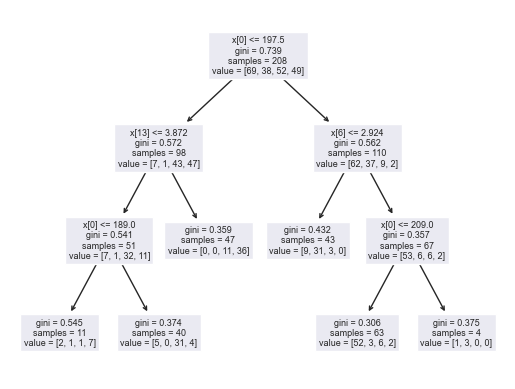

In [58]:
tree.plot_tree(clf)
plt.show()

In [59]:
#Esportazione albero di decisione
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("ruoli_tree")

'ruoli_tree.pdf'

Gradient boosting
Questo codice implementa una valutazione di validazione incrociata (cross-validation) per un classificatore basato su gradient boosting (HistGradientBoostingClassifier) utilizzando la libreria scikit-learn.

Viene creato un oggetto HGBC che rappresenta il classificatore basato su gradient boosting. Viene impostato il numero massimo di iterazioni (max_iter) a 150 e la velocità di apprendimento (learning_rate) a 0,1. Il classificatore viene addestrato sui dati x e y utilizzando il metodo fit().

Viene quindi eseguita la valutazione di cross-validation sul classificatore addestrato e sui dati x e y utilizzando il metodo cross_val_score(). Viene specificato che la validazione incrociata (cv=5) deve essere eseguita su 5 fette.

Infine, viene stampata la precisione media della cross-validation, insieme alla deviazione standard (espressa come intervallo di fiducia). La precisione viene calcolata come media delle valutazioni ottenute in ogni fetta e viene espresso come percentuale con due cifre decimali.

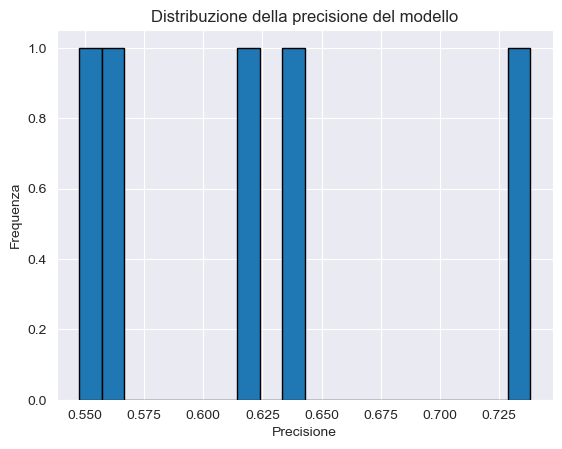

Accuracy: 0.62 (+/- 0.14)


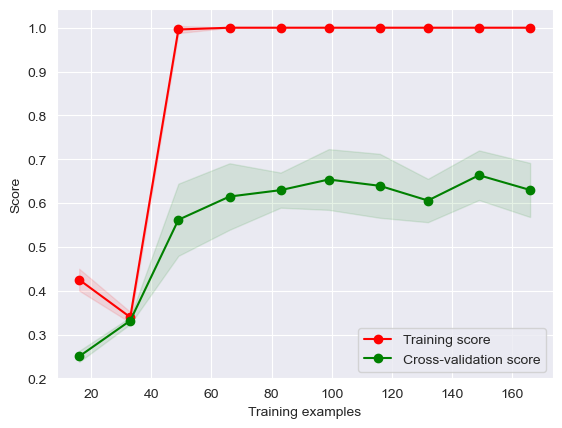

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt

HGBC = HistGradientBoostingClassifier(max_iter=150, learning_rate=0.1)
HGBC.fit(x, y)

scores = cross_val_score(HGBC, x, y, cv=5)

plt.hist(scores, bins=20, edgecolor='black')
plt.title("Distribuzione della precisione del modello")
plt.xlabel("Precisione")
plt.ylabel("Frequenza")
plt.show()

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
stampa_learning_curve(HGBC)

In [61]:
y_pred = HGBC.predict(players_without_role)
def convert_number(y_pred):
    lista = list()
    for val in y_pred:
        if val == 0:
            lista.append("Ala")
        if val == 1:
            lista.append("Centro")
        if val == 2:
            lista.append("Guardia")
        if val == 3:
            lista.append("Play")
    return lista
print(convert_number(y_pred))

[]


RandomForestClassifier
Questo codice implementa una valutazione di validazione incrociata (cross-validation) per un classificatore a foresta casuale (RandomForestClassifier) utilizzando la libreria scikit-learn.

Viene definito un intervallo di valori da testare per max_depth e random_state, che rappresentano rispettivamente la profondità massima degli alberi di decisione e il seme utilizzato dal generatore di numeri casuali all'interno del classificatore.

Viene quindi eseguita una valutazione di cross-validation su ogni combinazione di valori di max_depth e random_state e viene calcolata la media delle valutazioni ottenute in ogni fetta. I risultati vengono memorizzati in una lista di tuple scores.

La lista scores viene quindi convertita in un array numpy e viene individuato l'indice del punteggio massimo utilizzando il metodo np.argmax(). Viene quindi ottenuto il valore di max_depth e random_state corrispondenti al punteggio massimo.

Infine, viene addestrato un classificatore a foresta casuale utilizzando i valori di max_depth e random_state ottenuti in precedenza e viene eseguita una valutazione di cross-validation sul nuovo classificatore. Vengono infine stampati i risultati della cross-validation, ovvero la media delle valutazioni e la deviazione standard.

Best max_depth value: 2.0
Best random_state value: 256.0
Cross-validation scores: [0.73809524 0.73809524 0.80952381 0.65853659 0.58536585]
Average cross-validation score: 0.71 +/- 0.08


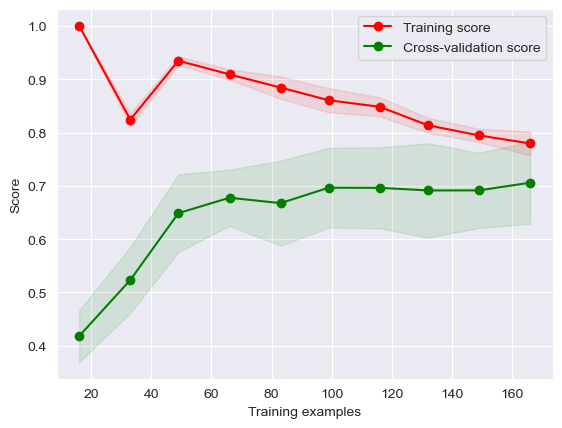

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Define a range of values to test for max_depth
max_depth_values = [2, 4, 6, 8, 10]

# Define a range of values to test for random_state
random_state_values = [0, 4, 16, 64, 256, 1024,4096]

# Store the mean cross-validation scores for each combination of max_depth and random_state
scores = []
for max_depth in max_depth_values:
    for random_state in random_state_values:
        RFC = RandomForestClassifier(max_depth=max_depth, random_state=random_state)
        cv_scores = cross_val_score(RFC, x, y, cv=5)
        scores.append((max_depth, random_state, cv_scores.mean()))

# Convert the scores list to a numpy array
scores = np.array(scores)

# Get the index of the maximum score
best_index = np.argmax(scores[:,2])

# Get the best max_depth and random_state values
best_max_depth = scores[best_index, 0]
best_random_state = scores[best_index, 1]

# Print the best max_depth and random_state values
print("Best max_depth value: {}".format(best_max_depth))
print("Best random_state value: {}".format(best_random_state))

RFC = RandomForestClassifier(max_depth=int(best_max_depth), random_state=int(best_random_state))
RFC.fit(x, y)
scores = cross_val_score(RFC, x, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))
stampa_learning_curve(RFC)

In [65]:
from sklearn.metrics import accuracy_score
# Predict the labels of the test data
y_pred = RFC.predict(x_test)

# Calculate the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 71.43%


Accuracy: 0.61 (+/- 0.11)


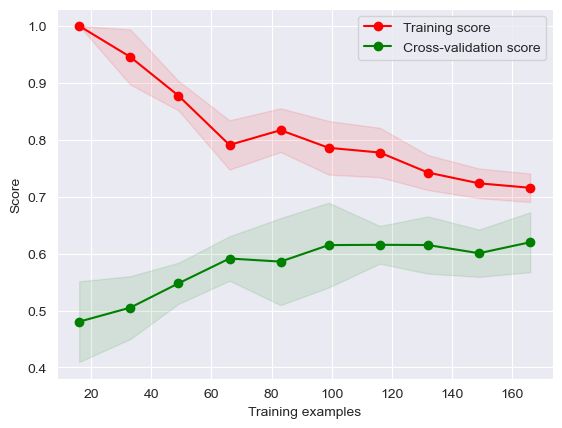

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#Se non scalo la x non converge.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)
#########
LR = LogisticRegression(max_iter=1000)
LR.fit(x_scal, y)

scores = cross_val_score(LR, x_scal, y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
stampa_learning_curve(LR)

In [67]:
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Effettua la codifica one-hot, rende y un vettore [0,0,0,0]
le = LabelEncoder()
y = le.fit_transform(y)
Y = to_categorical(y)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def create_model(neurons_first_layer, neurons_second_layer):
    model = Sequential()
    model.add(Dense(neurons_first_layer, activation='relu', input_shape=(15,)))
    model.add(Dense(neurons_second_layer, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=32, verbose=0)

neurons_first_layer = [32, 64, 128]
neurons_second_layer = [16, 32, 64]
param_grid = dict(neurons_first_layer=neurons_first_layer, neurons_second_layer=neurons_second_layer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x, Y)

# Stampa dei risultati
print("Migliori parametri: ", grid_result.best_params_)
print("Miglior punteggio: ", grid_result.best_score_)

C:\Users\nicol\AppData\Local\Temp\ipykernel_18552\974946843.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=32, verbose=0)


Migliori parametri:  {'neurons_first_layer': 128, 'neurons_second_layer': 32}
Miglior punteggio:  0.6540069699287414


In [ ]:
print('Accuratezza: %.2f' % (grid.score(x, Y)*100))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
prova = imputer.fit_transform(players_without_role)
y_pred = grid.predict(players_without_role)
def predizione(pred):
    strings = ["Ala", "Play", "Centro", "Guardia"]
    return [strings[np.argmax(vector)] for vector in pred]

print(predizione(y_pred))

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

import os
os.environ['OMP_NUM_THREADS'] = '1'

# Carica il dataset in un dataframe di pandas
giocatori = pd.read_csv("..\dataset\giocatori.csv")
giocatori = giocatori.drop('nome_giocatore', axis = 1)
giocatori = giocatori.drop('numero_giocatore', axis = 1)
giocatori = giocatori.drop('squadra', axis = 1)

def replace_role(row):
    if row['ruolo'] == 'Centro':
        return 0
    elif row['ruolo'] == 'Ala':
        return 1
    elif row['ruolo'] == 'Guardia':
        return 2
    elif row['ruolo'] == 'Play':
        return 3
    else:
        return 3

giocatori['ruolo'] = giocatori.apply(replace_role, axis=1)

# Definire una funzione per scalare i valori di ogni riga
def scale_cols(df, col):
    df = df[df[col] != 0]
    factor = 40/df[col].values
    float_cols = df.select_dtypes(include=['float64']).columns
    float_cols = float_cols.drop(col)
    df.loc[:, float_cols] = df[float_cols].mul(factor, axis=0)
    return df


from sklearn.preprocessing import MinMaxScaler

giocatori = scale_cols(giocatori, 'minuti')

# inizializza il scaler
scaler = MinMaxScaler()

# calcola i valori minimi e massimi per ogni colonna
scaler.fit(giocatori)

# normalizza i valori del dataset
giocatori = scaler.transform(giocatori)


# Seleziona le colonne che vuoi utilizzare come feature
features = ['altezza','t2_t', 't2_per','t3_t', 't3_per', 'rim_o', 'rim_d', 'rim_t', 'stop_d', 'stop_s','ass']

X = giocatori[features].values

# Inizializza il modello K-means con un numero di cluster definito (ad esempio, 5 cluster)
kmeans = KMeans(n_clusters=4, n_init=10)

# Fit il modello sui dati
kmeans.fit(X)

# Prevedi i cluster a cui appartengono ogni giocatore
labels = kmeans.predict(X)

from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_score)

print(labels[1])